Result Analysis

In [82]:
# Importing Libraries
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime
PLOT_COLORS = ["#36688D", "#F3CD05", "#F49F05", "#F18904", "#BDA589"]


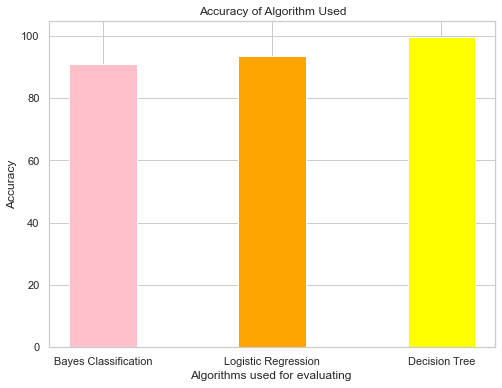

In [83]:
# creating the dataset
data = {
        'Bayes Classification':91.06351550960117,
        'Logistic Regression':93.50073855243723, 
        'Decision Tree':99.81515711645102
        }
algos = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (8, 6))
# creating the bar plot
colors = ['pink','orange','yellow']
plt.bar(algos, values, color = colors,
        width = 0.4)
plt.xlabel("Algorithms used for evaluating ")
plt.ylabel("Accuracy")
plt.title("Accuracy of Algorithm Used")
plt.show()

Respective Accuracies

Decision Tree - 99.8%

Logistic Refression - 93.5%

Bayes Classification - 91.6%

### Correlating between features in Dataset

In [84]:
df = pd.read_csv("./Final-Database.csv")
df.corr()

,Title_characters,Day,time-part,Time_Category,views,Tag_words,No. Of Charcters (Tags),T/NT,likes,dislikes,comment_count,Comment Disabled
Title_characters,1.000000,-0.004891,-0.090722,0.026638,-0.039916,0.355402,0.339992,-0.142971,-0.118296,-0.017467,-0.073091,0.045747
Day,-0.004891,1.000000,0.033152,-0.014322,-0.000197,0.021442,0.021289,-0.000749,-0.006423,-0.002759,-0.004428,-0.002717
time-part,-0.090722,0.033152,1.000000,-0.249546,0.015467,0.004720,0.016136,-0.008193,0.034102,0.016982,0.024946,0.015489
Time_Category,0.026638,-0.014322,-0.249546,1.000000,0.014437,-0.078439,-0.076622,0.027699,-0.009164,-0.003294,-0.018153,0.010901
views,-0.039916,-0.000197,0.015467,0.014437,1.000000,0.045788,0.032908,0.340320,0.853458,0.724484,0.775190,-0.019533
Tag_words,0.355402,0.021442,0.004720,-0.078439,0.045788,1.000000,0.956174,0.048139,-0.016820,0.020932,-0.006515,0.006310
No. Of Charcters (Tags),0.339992,0.021289,0.016136,-0.076622,0.032908,0.956174,1.000000,0.034235,-0.024186,0.016244,-0.011698,0.005197
T/NT,-0.142971,-0.000749,-0.008193,0.027699,0.340320,0.048139,0.034235,1.000000,0.357841,0.077508,0.214539,-0.068707
likes,-0.118296,-0.006423,0.034102,-0.009164,0.853458,-0.016820,-0.024186,0.357841,1.000000,0.595594,0.818951,-0.028442
dislikes,-0.017467,-0.002759,0.016982,-0.003294,0.724484,0.020932,0.016244,0.077508,0.595594,1.000000,0.802992,-0.005183


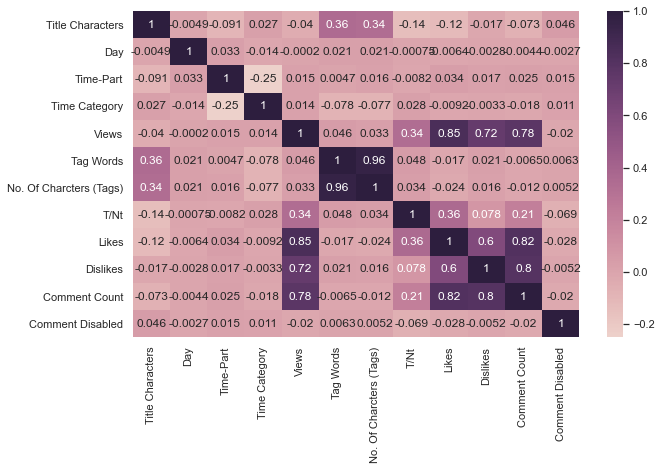

In [85]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

<p>The correlation map and correlation table above say that views and likes are highly positively correlated which is 0.85. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.</p>

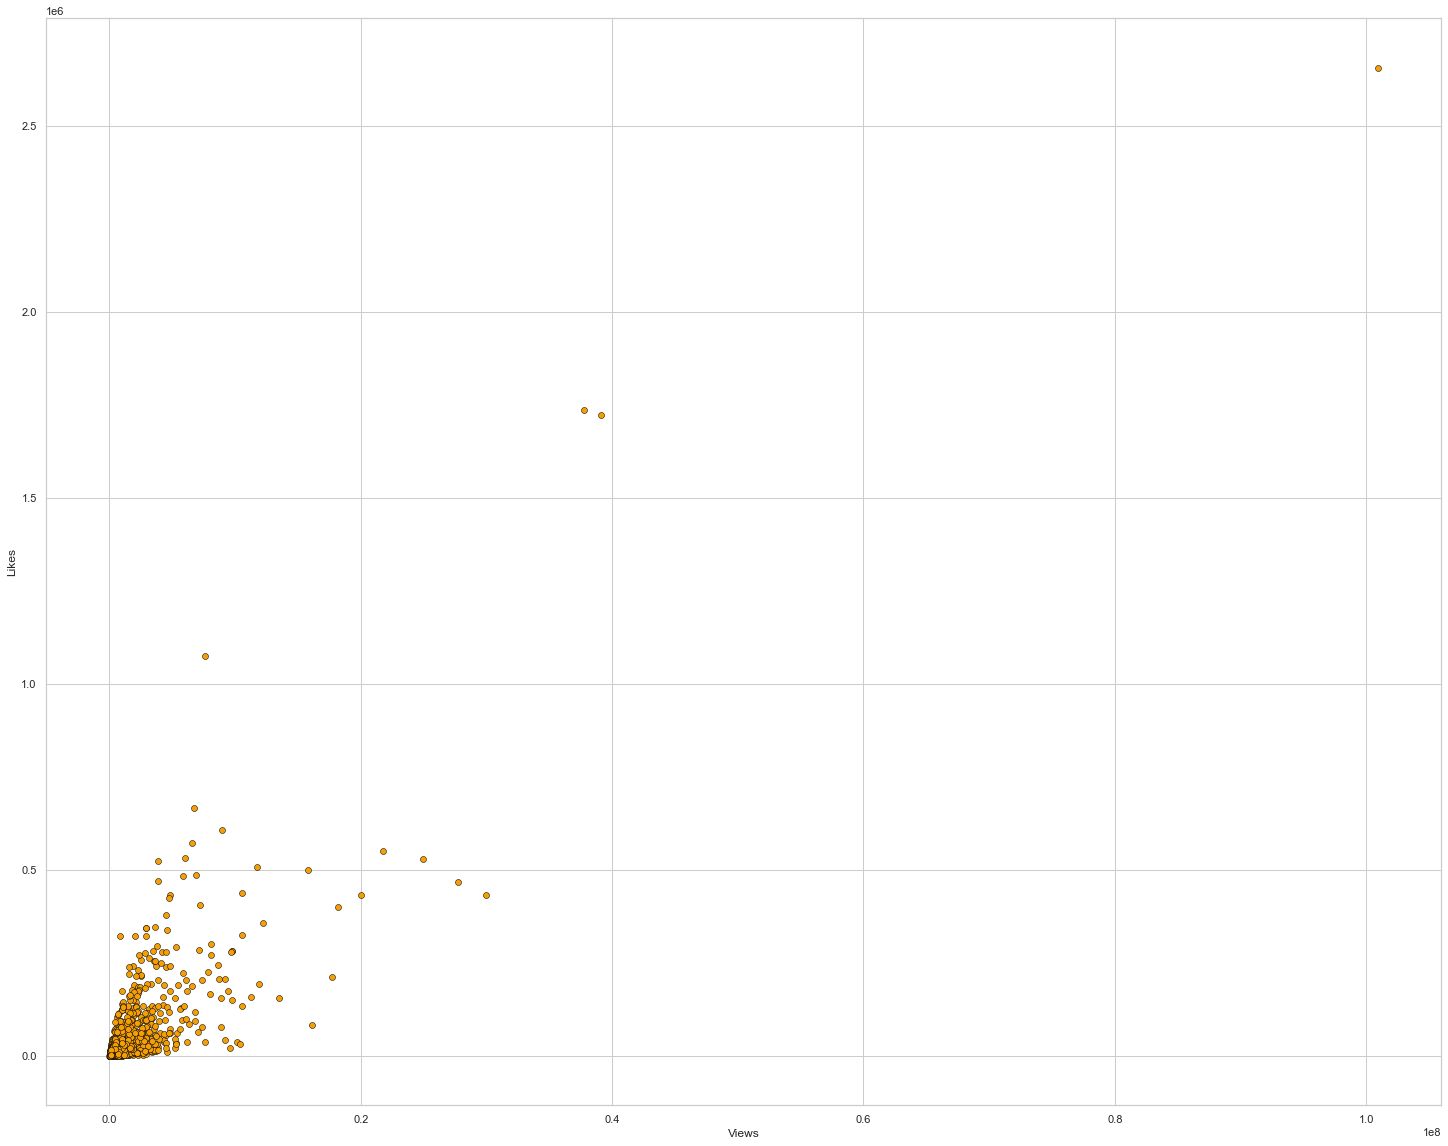

In [86]:
# Scatter Plot
fig, ax = plt.subplots()
_ = plt.scatter(x = df['views'], y = df['likes'], color = PLOT_COLORS[2], 
edgecolors = "#000000", linewidths = 0.5)
_ = ax.set(xlabel = "Views", ylabel = "Likes")

We see that views and likes are truly positively correlated because as one increases, the other increases too—mostly.

##### Creating a seperate dataSet for trending videos

In [87]:
dataframe = df[df["T/NT"] > 0]

### Likes Analysis

C:\Users\Welcome\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


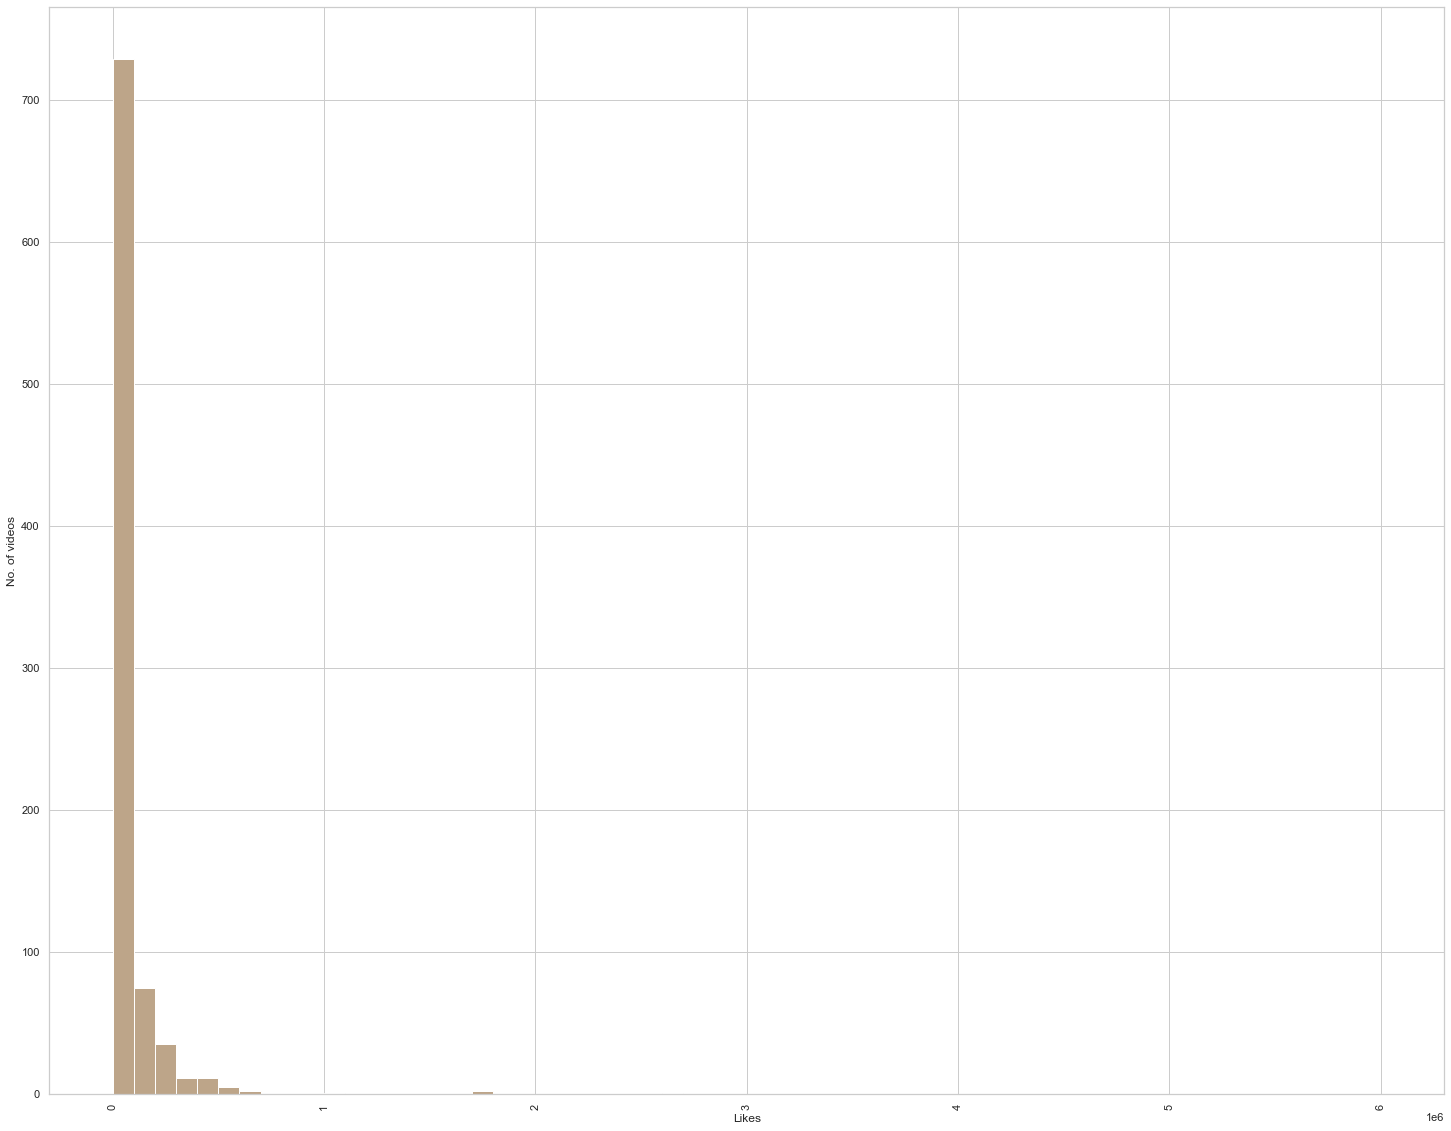

In [88]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()

_ = sns.distplot(dataframe["likes"], kde=False, 
                color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                bins=np.linspace(0, 6e6, 61), ax=ax)

_ = ax.set(xlabel="Likes", ylabel="No. of videos")

_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have between 0 and 100,000 likes. Let us plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

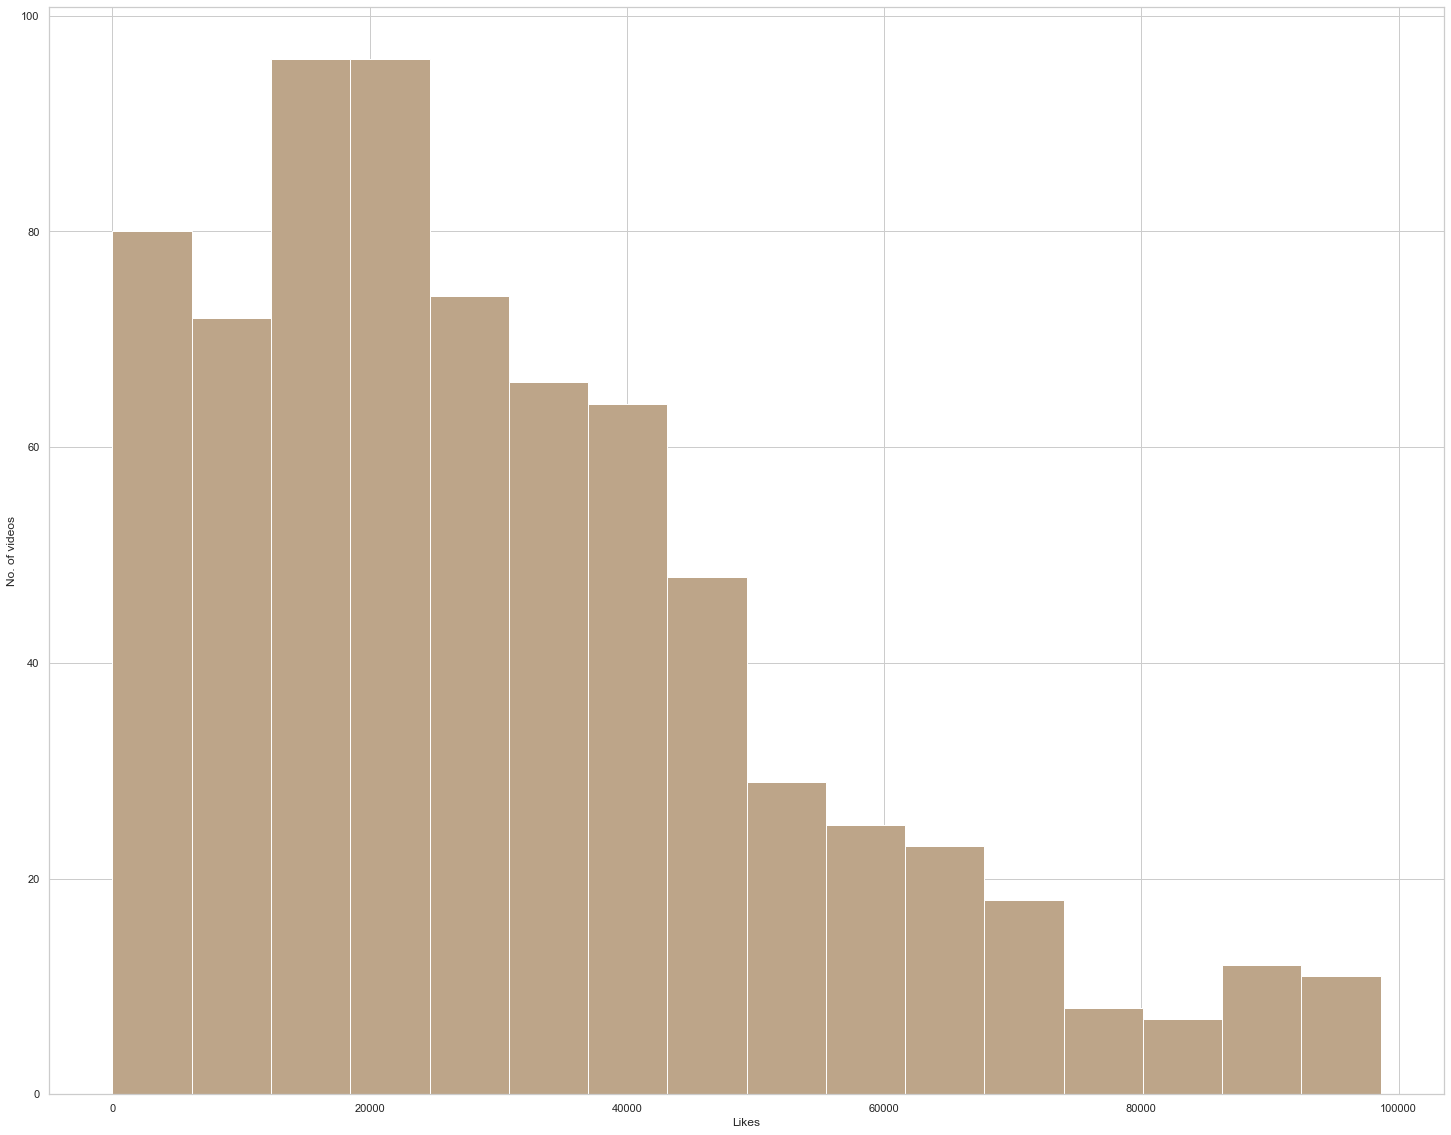

In [89]:
fig, ax = plt.subplots()

_ = sns.distplot(dataframe[dataframe["likes"] <= 100000]["likes"], kde=False, 
                color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax = ax)
                
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

We can see that the majority of trending videos have 70000 likes or less.

In [90]:
dataframe[dataframe['likes'] < 70000]['likes'].count() / dataframe['likes'].count() * 100

78.21100917431193

So, it is around 78%, which means that the percentage of videos with less than 45k likes are more likely to trend.

#### Views Analysis

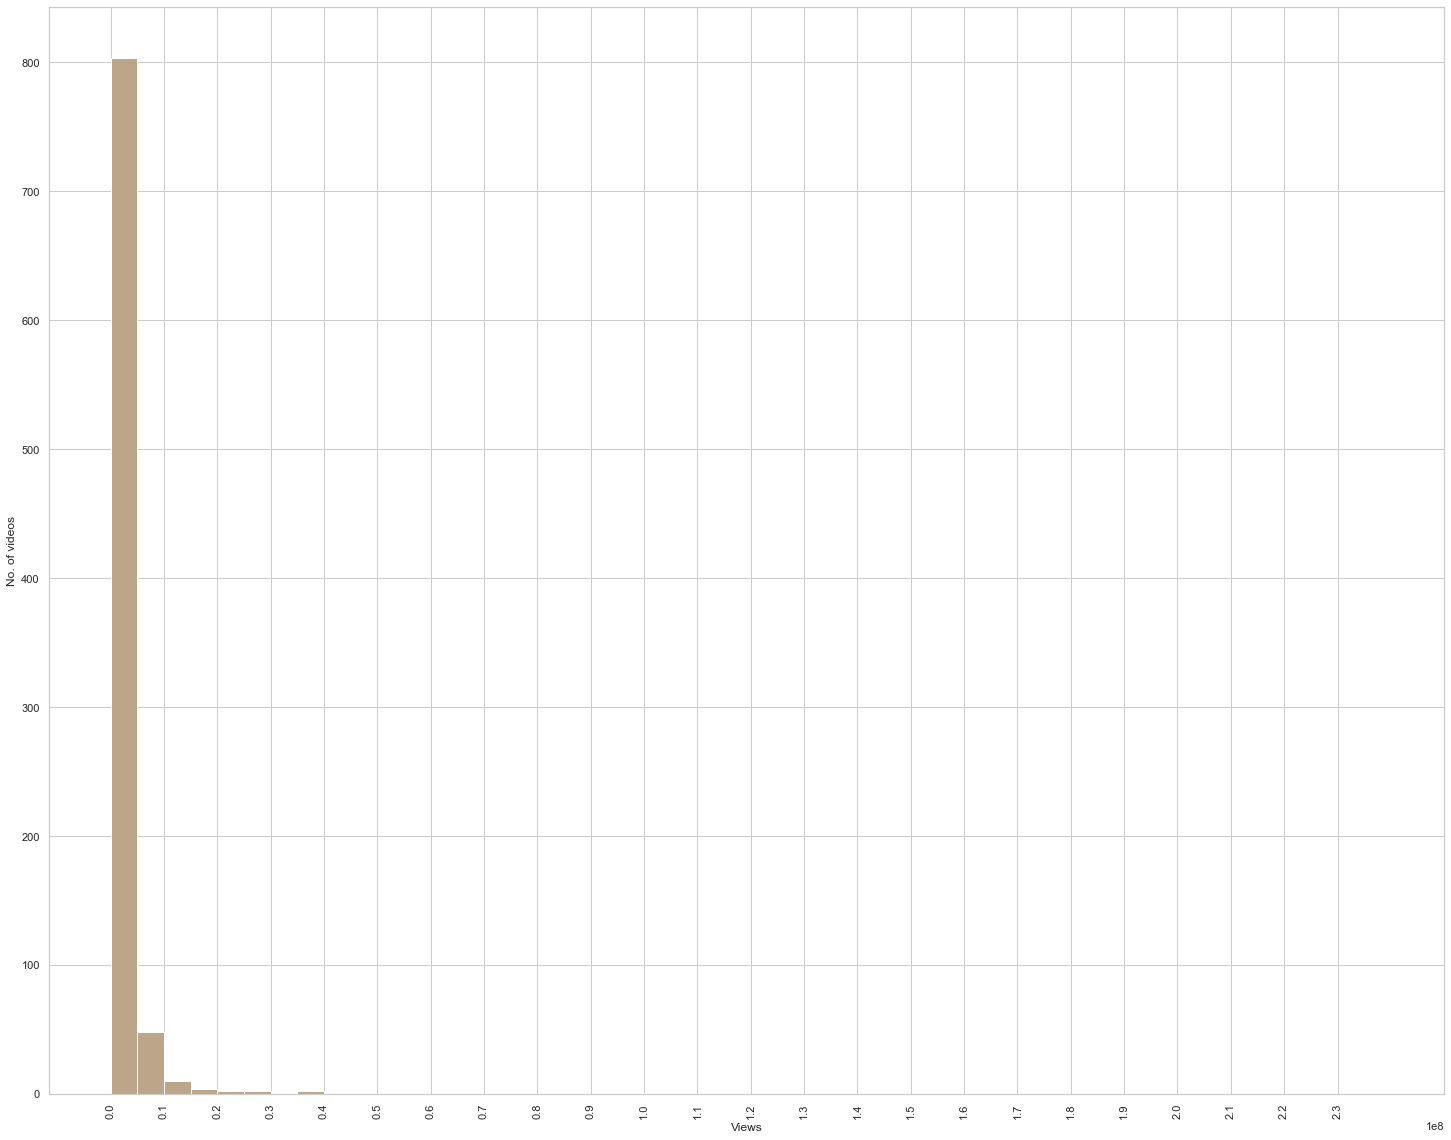

In [91]:
fig, ax = plt.subplots()
_ = sns.distplot(dataframe["views"], kde=False, color=PLOT_COLORS[4], 
                hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)

_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))

_ = ax.set_xlim(right=2.5e8)

_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have between 0 and 1,00,00,000 views. Let us plot the histogram just for videos with 1000,000 views or less to get a closer look at the distribution of the data

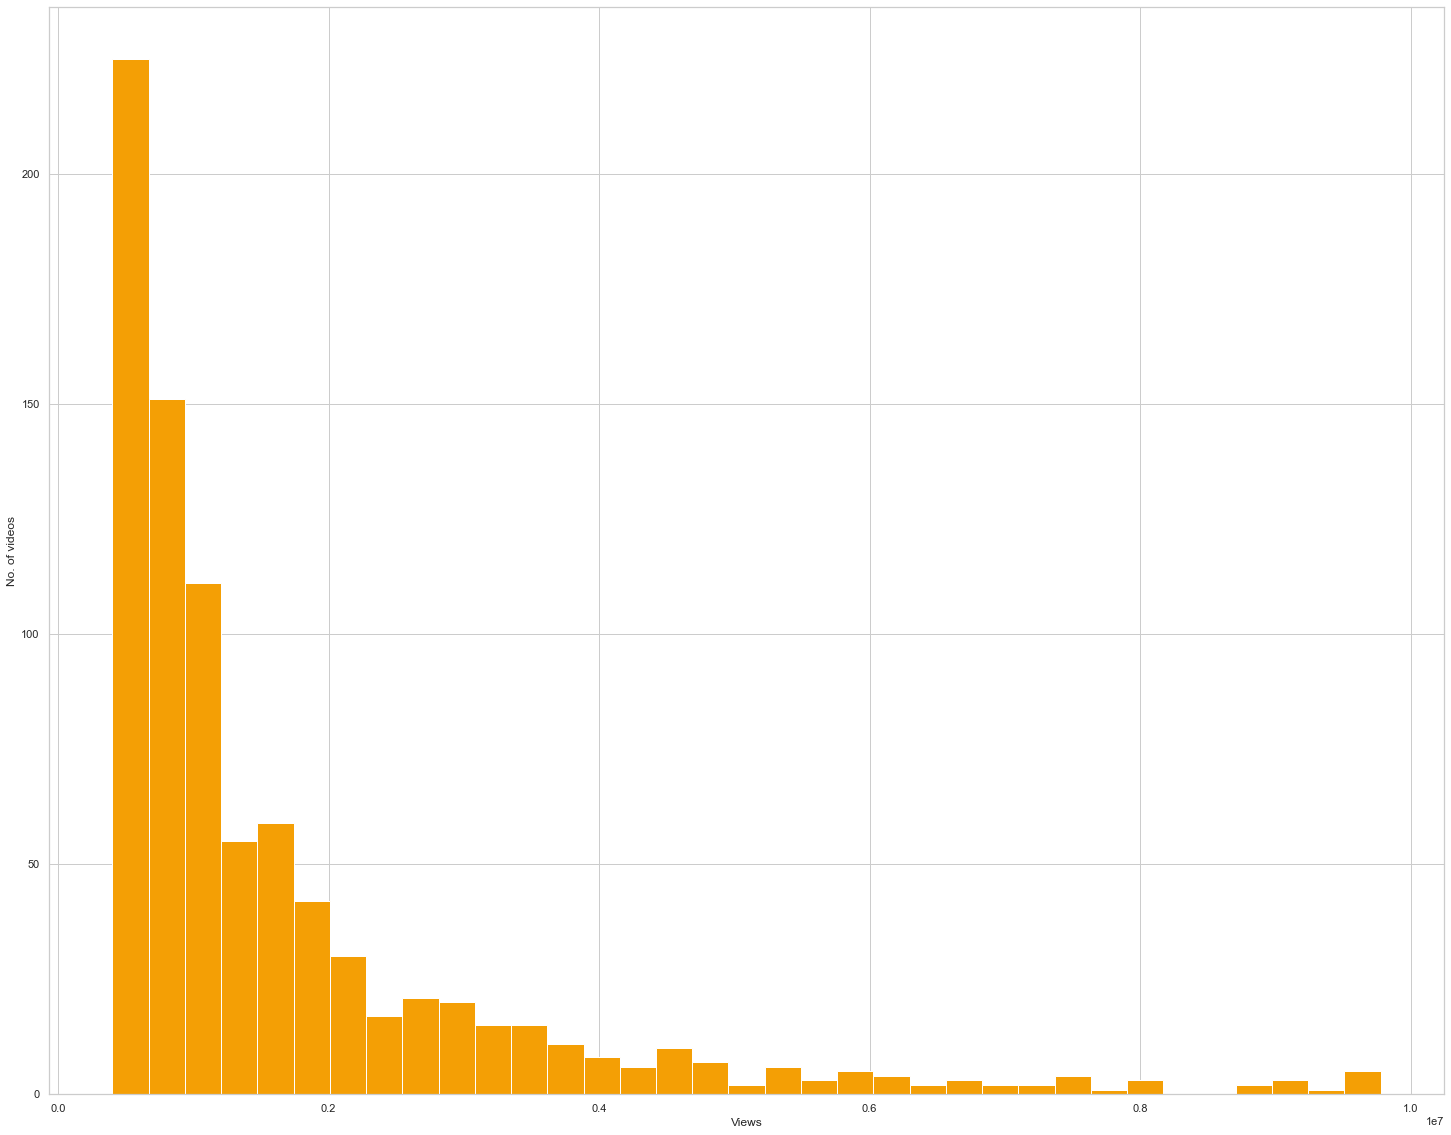

In [92]:
dataframe = df[df["T/NT"] > 0]
fig, ax = plt.subplots()
_ = sns.distplot(dataframe[dataframe["views"] < 10000000]["views"], kde=False, 
                color=PLOT_COLORS[2], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

We can see that the majority of trending videos have 2000000 views or less.

In [93]:
df[df['views'] < 2e6]['views'].count() / df['views'].count() * 100


94.41304347826087

So, it is around 94%, which means that the percentage of videos with less than 2 million views are more trending.

In [94]:
dataframe.shape

(872, 20)

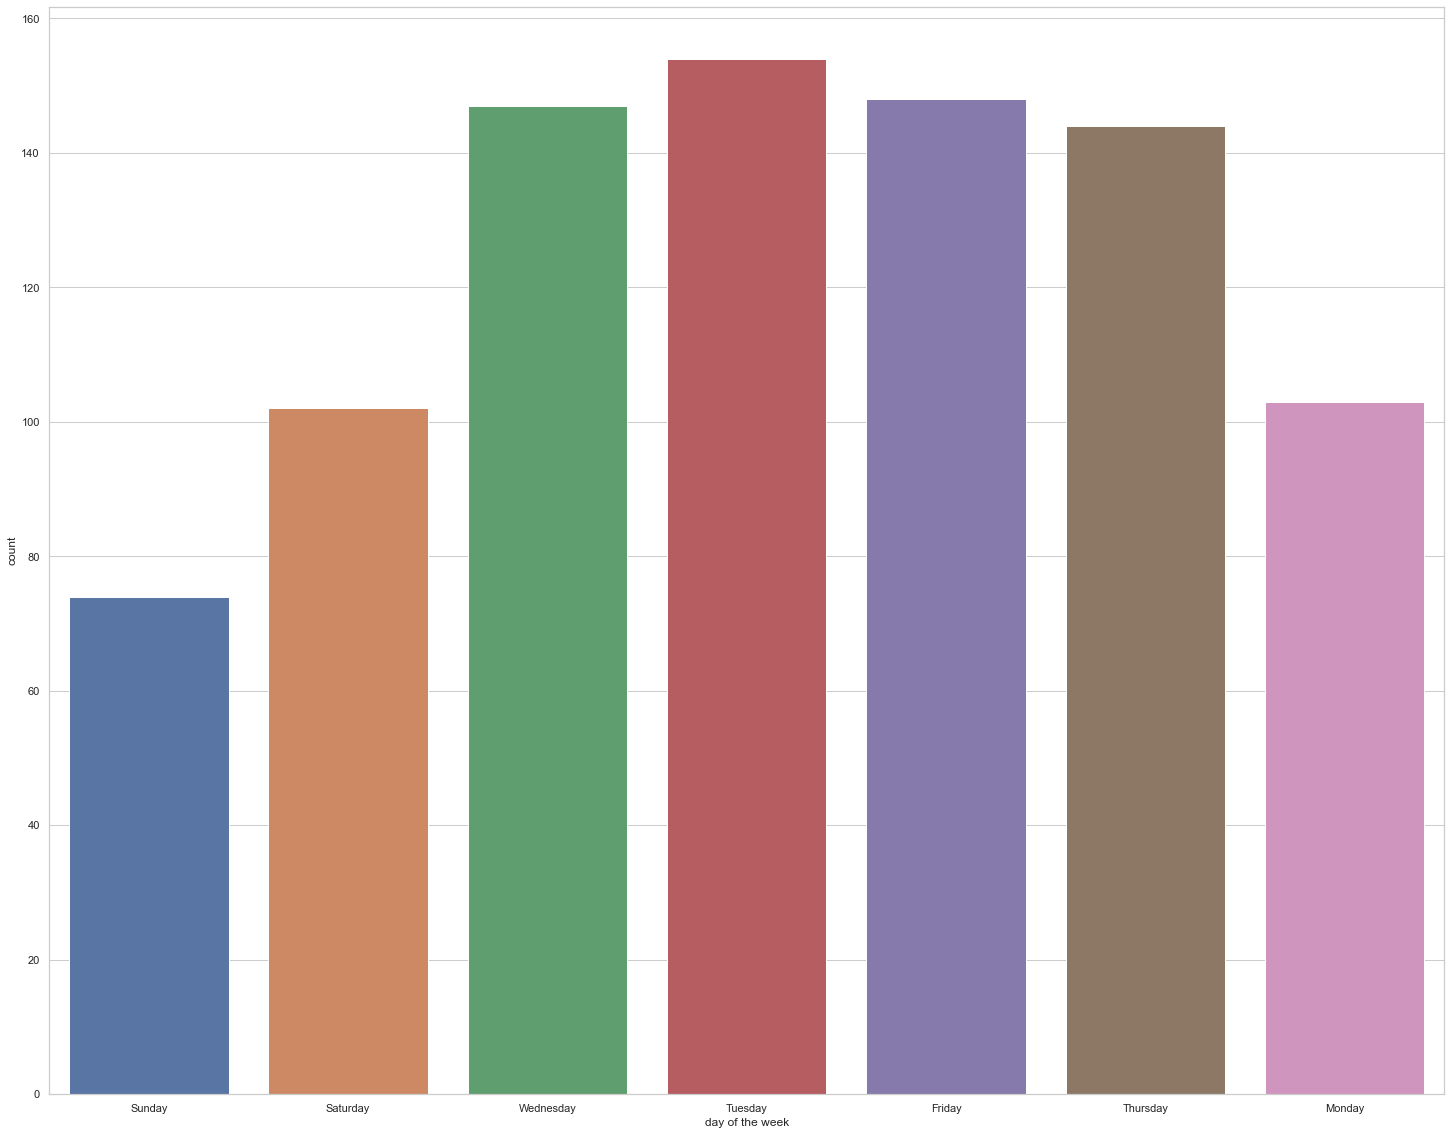

In [95]:
sns.countplot(x = 'day of the week', data = dataframe)
sns.set(rc={'figure.figsize':(5,5)})

The countplot clearly shows that more videos go to Trending page when uploaded on Tuesday, which means Tuesday is the best day to upload your video.

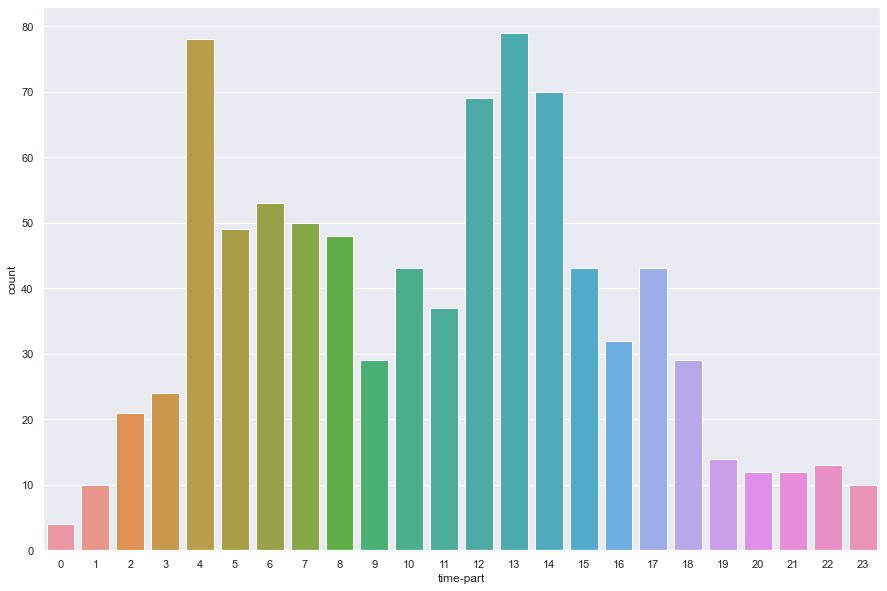

In [97]:
sns.countplot(x='time-part',data = dataframe)
sns.set(rc={'figure.figsize':(20,15)})

The countplot clearly shows that more videos go to Trending page when uploaded on 1 PM and 4 AM.

C:\Users\Welcome\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


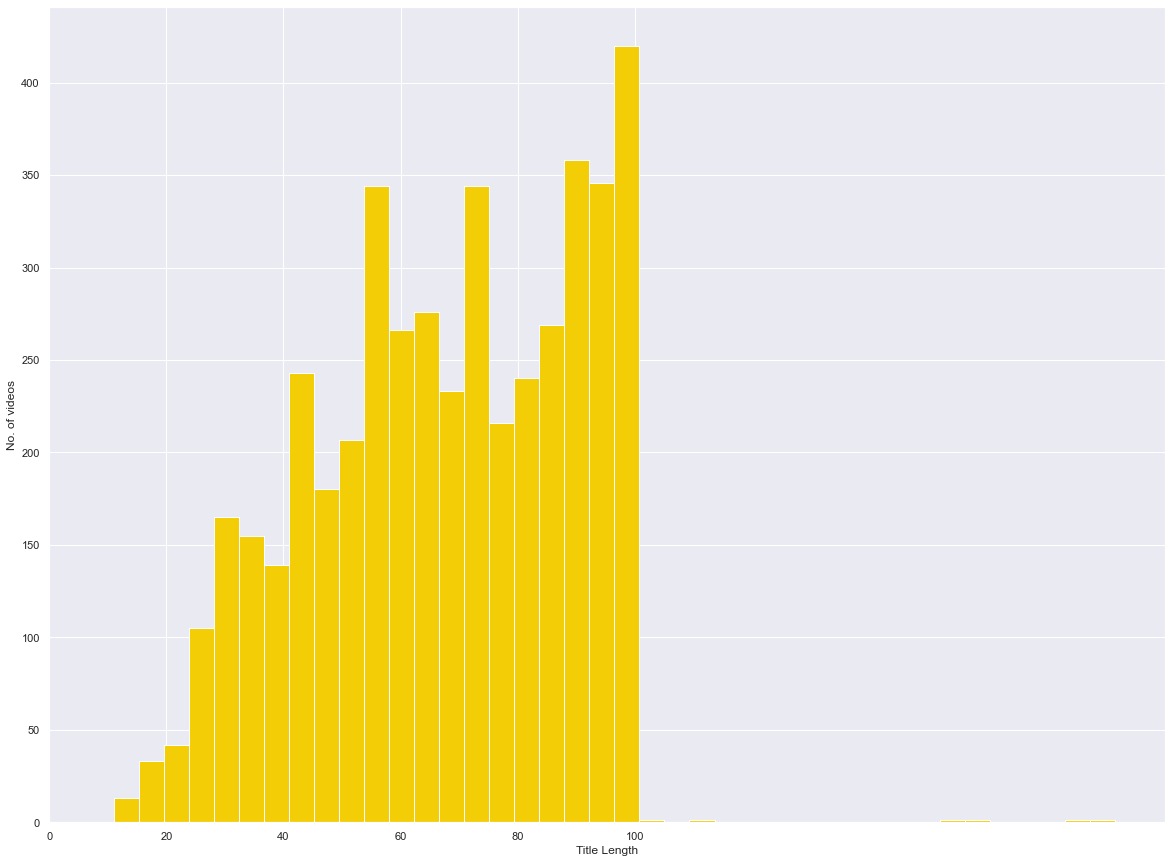

In [98]:
# Video Title Analysis
df["title_length"] = df["Video_Title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[1], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 20))


As we all know in Youtube you can't put video title of more than 100 words. The subplot clearly shows that video title of 80 to 100 words are most favourable.

In [99]:
from collections import Counter
title_words = list(df["Video_Title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 5808),
 ('-', 1761),
 ('2018', 780),
 ('Episode', 579),
 ('||', 452),
 ('2017', 418),
 ('Full', 362),
 ('&', 333),
 ('The', 326),
 ('Telugu', 276),
 ('Movie', 246),
 ('to', 225),
 ('Song', 222),
 ('Video', 207),
 ('in', 206),
 ('ETV', 200),
 ('Latest', 194),
 ('and', 178),
 ('News', 174),
 ('of', 166),
 ('New', 165),
 ('I', 164),
 ('Songs', 155),
 ('on', 154),
 ('Official', 153)]

Ignoring symbols like "|" and "-" which occured a lot in the trending video titles: 5808 times and 1761 times respectively. We notice also that words "2018", "Episode", and "2017", are common in trending video titles; each occuring in 400-800 video titles.

<AxesSubplot:xlabel='Tag_words'>

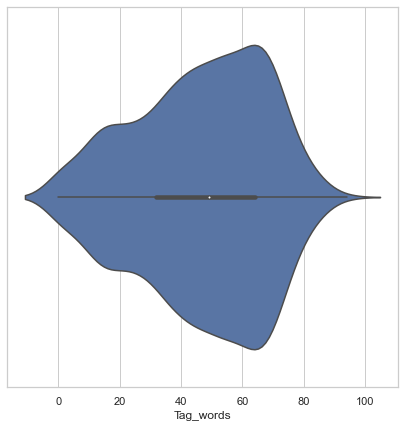

In [69]:
# Tags Analysis
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize =(7,7))
sns.violinplot(ax = ax, x = dataframe["Tag_words"])

From the plot, we can see that most of trending videos have between 45 and 70 tags.

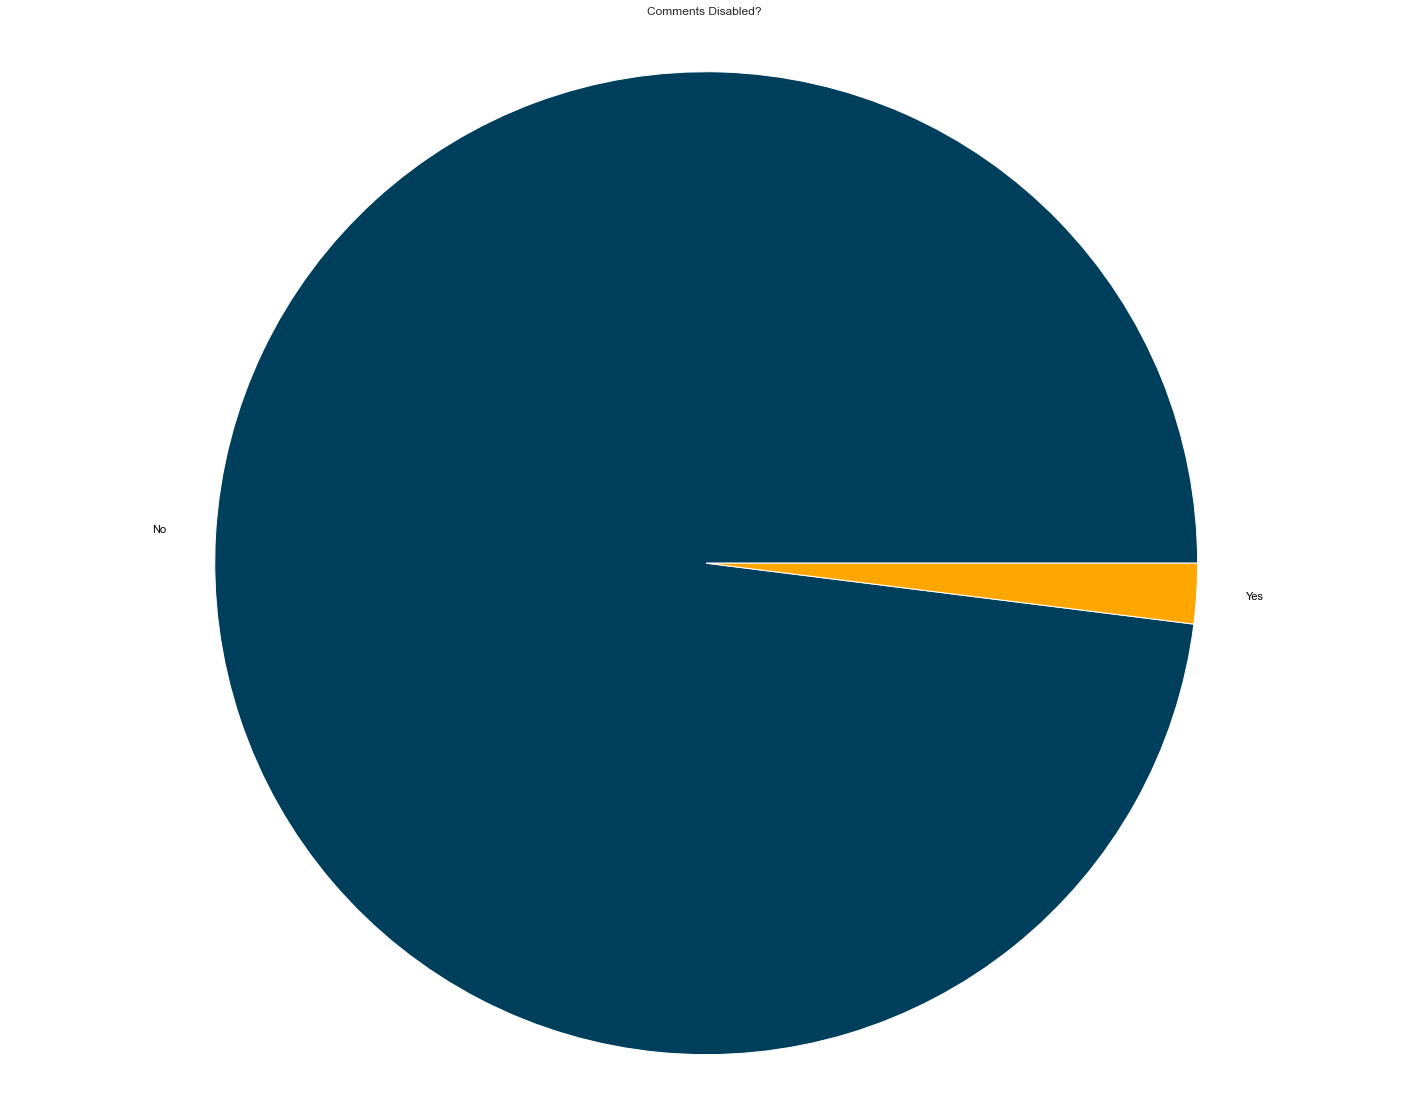

In [108]:
# Comments Disabled
value_counts = df["Comment Disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')


In [104]:
df["Comment Disabled"].value_counts(normalize=True)


False    0.980217
True     0.019783
Name: Comment Disabled, dtype: float64

We see that only 1% of trending videos prevented users from commenting.